In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [665]:
#1
# Read the dataset
df = pd.read_csv("ProjectDataSet.csv")

In [666]:
#2
# Rename all columns for easier use
df.rename(columns={
    "Children tested for lead by age 3 years Number": "Tested_Num",
    "Children tested for lead by age 3 years Percentage": "Tested_Pct",
    "geo_area_name": "Area",
    "geo_type": "GeoType",
    "time_period": "Year",
    "borough_id": "BoroughID",
    "geoid": "GeoID",
    "data_as_of": "DataAsOf"
}, inplace=True)

#drop irrelevant or empty columns
df.drop(columns=[
    'Children tested for lead by age 3 years Number _NOTES',
    'Children tested for lead by age 3 years Percentage _NOTES',
    'DataAsOf',
    'GeoID'
], inplace=True, errors='ignore')

In [667]:
#3
#check what columns exist
print(df.columns) 

Index(['GeoType', 'geo_area_id', 'Area', 'BoroughID', 'Year', 'Tested_Num',
       'Tested_Pct'],
      dtype='object')


In [ ]:
#4
# Check column types
print(df.dtypes)

GeoType         object
geo_area_id      int64
Area            object
BoroughID      float64
Year             int64
Tested_Num       int64
Tested_Pct       int64
dtype: object


In [ ]:
#5
#Convert numerical columns to proper types and handle missing values"""
numerical_columns = ['Tested_Num', 'Tested_Pct', 'Year']
categorical_columns = ['GeoType']

In [ ]:
#6
# Convert numerical columns to numeric (in case of object types)
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [671]:
#7
# Check for missing values
print("Missing values in each column:")
print(df[numerical_columns + categorical_columns].isnull().sum())

Missing values in each column:
Tested_Num    0
Tested_Pct    0
Year          0
GeoType       0
dtype: int64


In [672]:
#8
# Fill missing numerical values with column mean
mean_values = df[numerical_columns].mean()
for column in numerical_columns:
    df[column] = df[column].fillna(mean_values[column])
    #df[column] = df[column].replace(0, mean_values[column])     if zeros are invalid

In [673]:
#9
# Convert categorical columns to category type
df['GeoType'] = df['GeoType'].astype('category')

In [674]:
#10
# Print first few rows
print("First 20 rows of cleaned data:")
print(df.head(20))

First 20 rows of cleaned data:
    GeoType  geo_area_id       Area  BoroughID  Year  Tested_Num  Tested_Pct
0   Borough            1      Bronx        1.0  2008       17500          86
1   Borough            1      Bronx        1.0  2009       18000          87
2   Borough            1      Bronx        1.0  2010       17700          87
3   Borough            1      Bronx        1.0  2011       19400          88
4   Borough            1      Bronx        1.0  2012       19000          87
5   Borough            1      Bronx        1.0  2013       18500          87
6   Borough            1      Bronx        1.0  2014       17800          87
7   Borough            1      Bronx        1.0  2015       17300          86
8   Borough            1      Bronx        1.0  2016       17100          86
9   Borough            2   Brooklyn        2.0  2008       29700          78
10  Borough            2   Brooklyn        2.0  2009       30500          80
11  Borough            2   Brooklyn        2.

#### One-hot Encoding of Categorical Variables and Regression Prep
1. Apply one-hot encoding to categorical feature.
2. Define independent and dependent variables for regression.


In [675]:
#11
# One-hot encode GeoType
df_encoded = pd.get_dummies(df, columns=['GeoType', 'Area'], drop_first=True)

In [676]:
#12
# Define target variable
y = df_encoded['Tested_Pct']

In [677]:
#13
# Define feature set (using Year, Tested_Num, and GeoType encoding)
X = df_encoded[['Tested_Num', 'Year', 'BoroughID'] + [col for col in df_encoded.columns if col.startswith('GeoType_') or col.startswith('Area_')]]

In [678]:
#14
# Display types after encoding
print("Data types after one-hot encoding:")
print(df_encoded.dtypes)

Data types after one-hot encoding:
geo_area_id                                    int64
BoroughID                                    float64
Year                                           int64
Tested_Num                                     int64
Tested_Pct                                     int64
GeoType_Citywide                                bool
GeoType_Neighborhood (UHF 42)                   bool
Area_Bedford Stuyvesant - Crown Heights         bool
Area_Bensonhurst - Bay Ridge                    bool
Area_Borough Park                               bool
Area_Bronx                                      bool
Area_Brooklyn                                   bool
Area_Canarsie - Flatlands                       bool
Area_Central Harlem - Morningside Heights       bool
Area_Chelsea - Clinton                          bool
Area_Coney Island - Sheepshead Bay              bool
Area_Crotona -Tremont                           bool
Area_Downtown - Heights - Slope                 bool
Area_East F

## Split the dataset into training and testing sets

In [679]:
#15
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

print('Split X: ', trainX.shape, testX.shape)
print('Split Y: ', trainY.shape, testY.shape)

Split X:  (345, 52) (87, 52)
Split Y:  (345,) (87,)


## Feature Scaling

### Sandarized Scalling

In [680]:
#16
original = df[numerical_columns]
standardizedArray = preprocessing.scale(original)
standardized = pd.DataFrame(standardizedArray, columns=numerical_columns)

### Normalized Scalling

In [681]:
#17
normalizedArray = preprocessing.MinMaxScaler().fit_transform(df[numerical_columns])
normalized = pd.DataFrame(normalizedArray, columns=numerical_columns)

# Task 1: Data Preparation and Cleaning
In this task I:

* Loaded the dataset and renamed columns for clarity.

* Dropped irrelevant or empty columns to reduce noise.

* Converted data types (e.g., numeric columns to float/int, categorical to category) to ensure compatibility with machine learning models.

* Handled missing and zero values in numerical columns by replacing them with the column mean, improving model robustness.

* One-hot encoded the GeoType categorical variable to prepare it for regression.

* Split the data into training and testing sets and normalized the features using StandardScaler.

# Task 2 -> Data Visualization

In [682]:

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import r_regression, f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox, yeojohnson
directory = 'data/graphs'
import os
if not os.path.exists(directory):
    os.makedirs(directory)

In [683]:
#1
# Calculate skew values for each numerical column
skew_values = df[numerical_columns].apply(lambda x: x.skew())
print("Skewness values:")
print(skew_values)

Skewness values:
Tested_Num    5.210841
Tested_Pct   -1.276192
Year          0.000000
dtype: float64


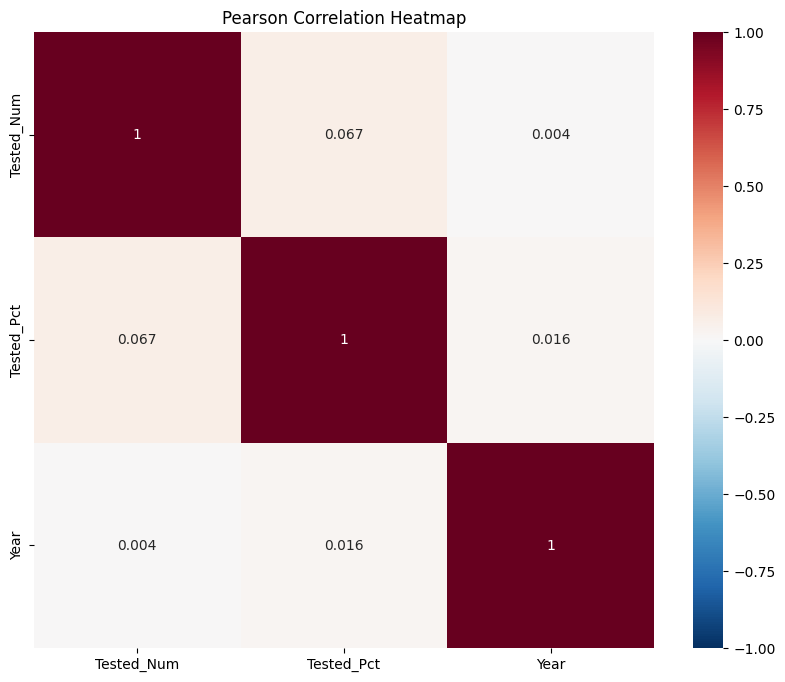

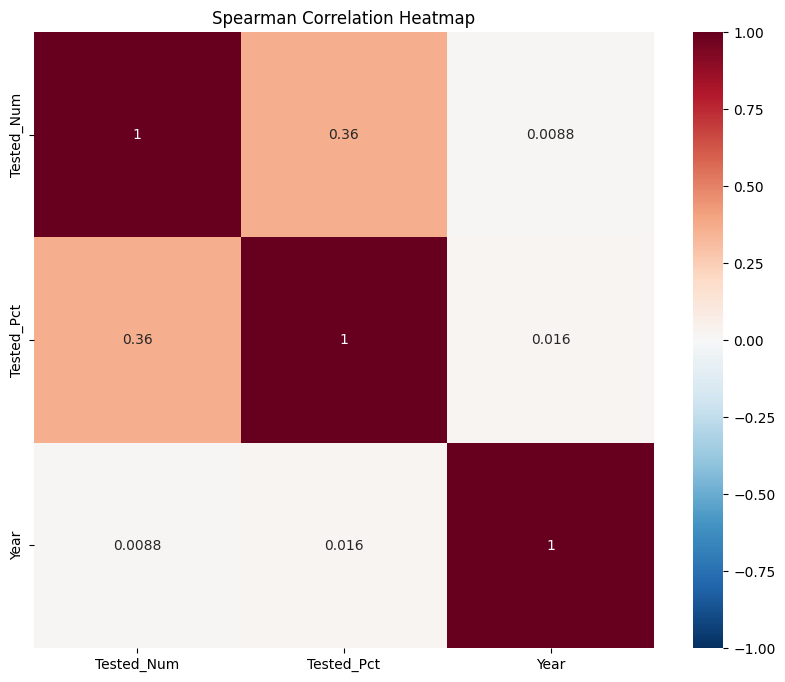

In [684]:
#2
# Pearson correlation heatmap
corr = df[numerical_columns].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Spearman correlation heatmap
corr = df[numerical_columns].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

Saved: data/graphs/Tested_Num.png
Saved: data/graphs/Tested_Pct.png
Saved: data/graphs/Year.png


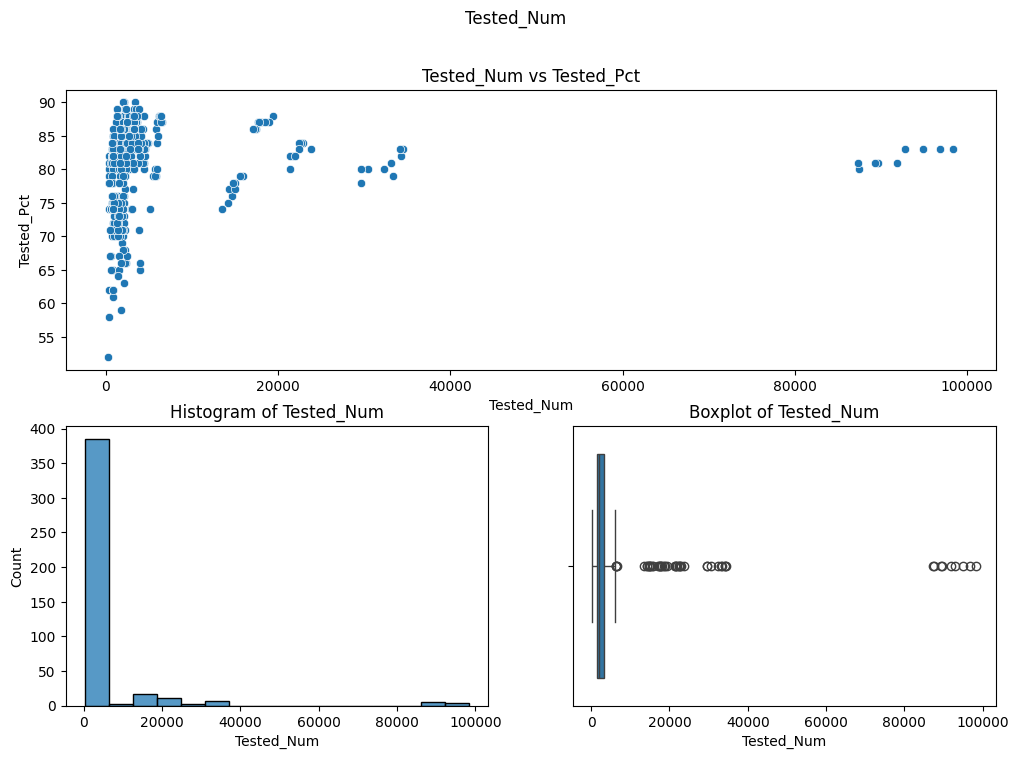

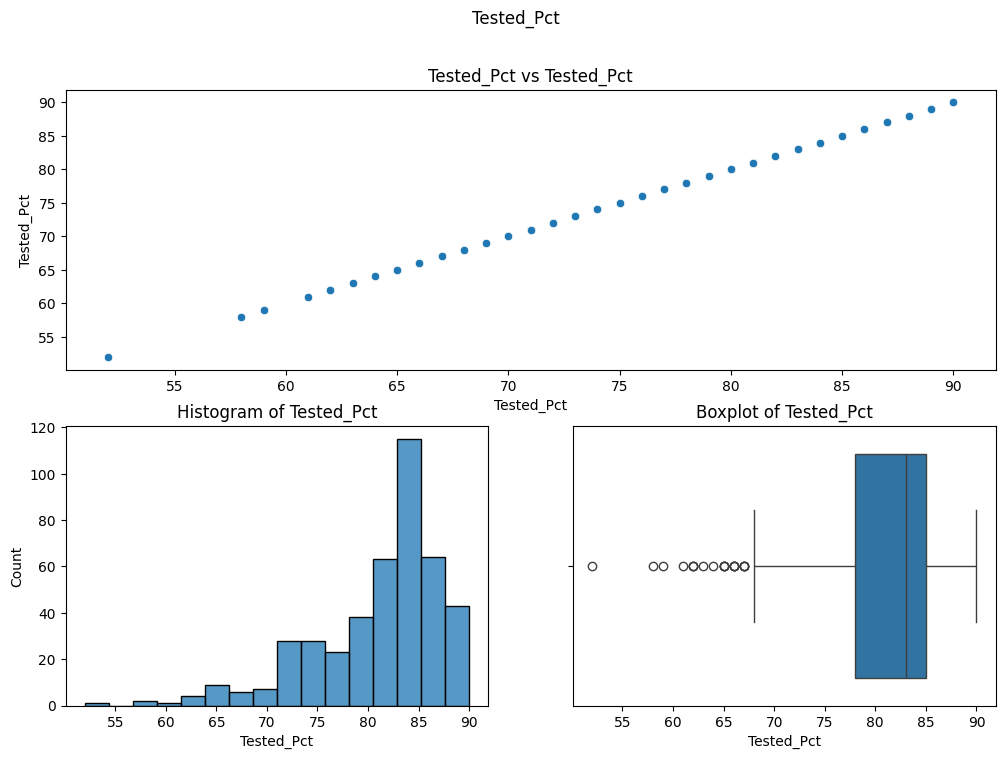

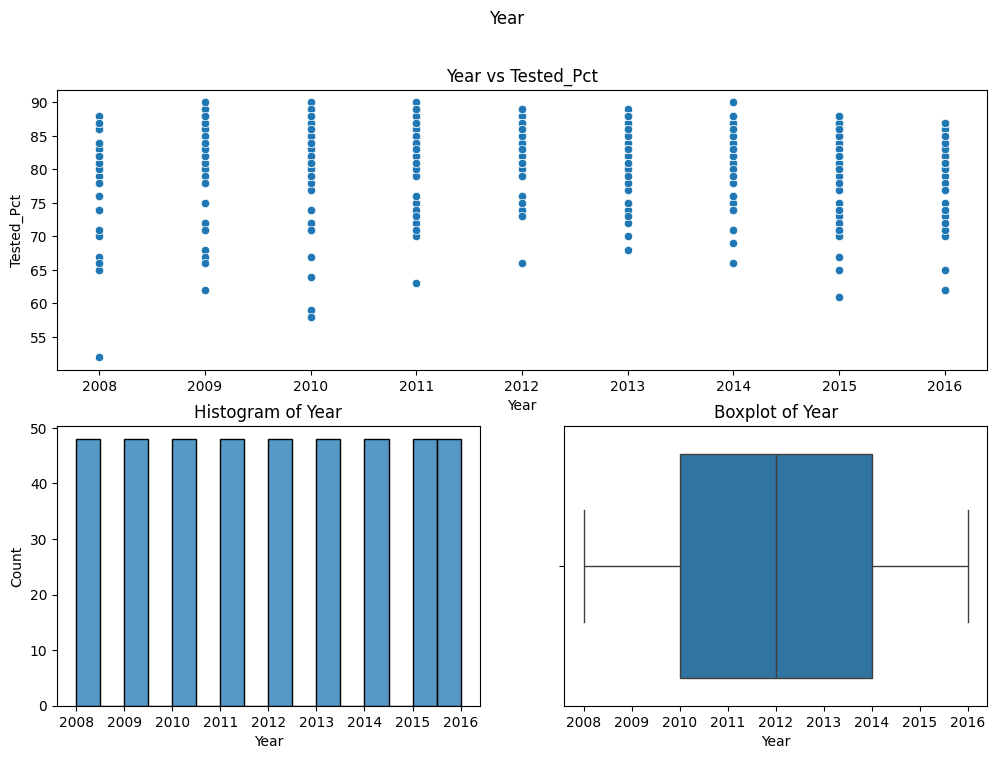

In [685]:
#Histograms, Boxplots, Scatter Plots
output_dir = 'data/graphs'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(filename):
    return filename.replace('/', '_').replace('\\', '_')

for col in numerical_columns:
    fig = plt.figure(figsize=(12, 8))
    gs = plt.GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(data=df, x=col, y='Tested_Pct', ax=ax1)
    ax1.set_title(f'{col} vs Tested_Pct')

    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=col, data=df, bins=16, ax=ax2)
    ax2.set_title(f'Histogram of {col}')

    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df, x=col, orient='h', ax=ax3)
    ax3.set_title(f'Boxplot of {col}')

    sanitized = sanitize_filename(col)
    path = os.path.join(output_dir, f"{sanitized}.png")
    fig.suptitle(col.title())
    fig.savefig(path)
    print(f"Saved: {path}")


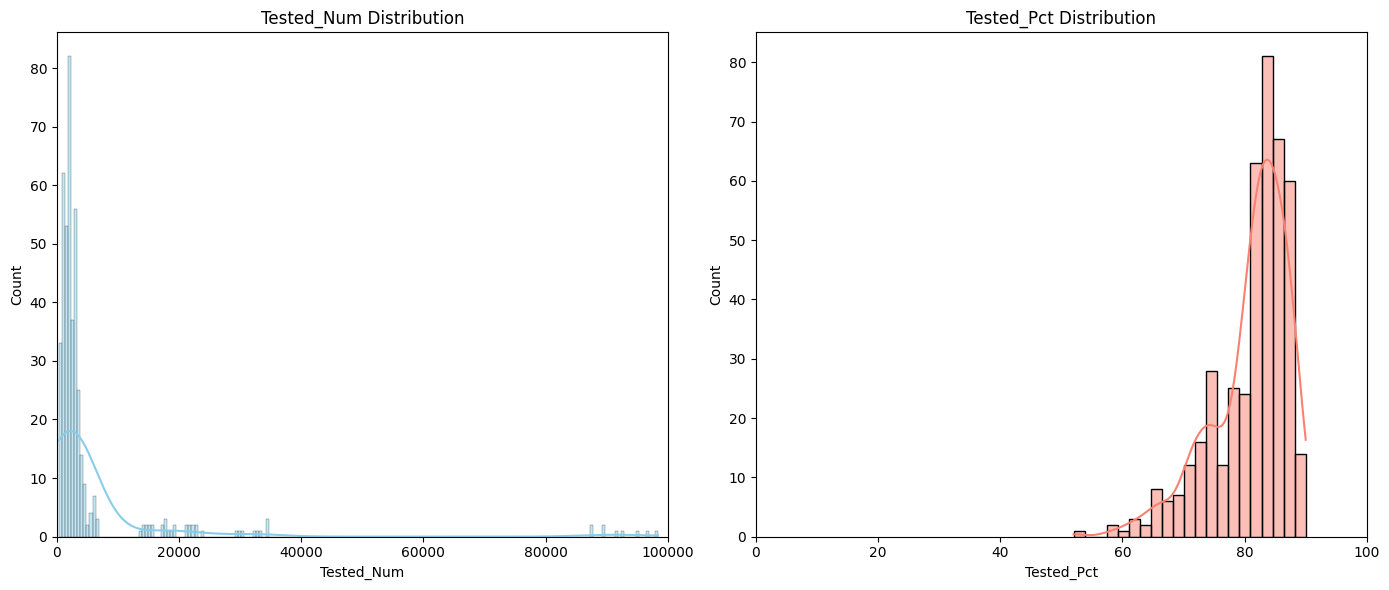

In [686]:
#4
# Skewness Histograms (before transformation)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Tested_Num'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Tested_Num Distribution')
ax[0].set_xlim(0, 100000)

sns.histplot(df['Tested_Pct'], kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Tested_Pct Distribution')
ax[1].set_xlim(0, 100)

plt.tight_layout()
plt.show()

In [687]:
#5
# Log Transformation
df['log_tested_num'] = np.log(df['Tested_Num'])
df['log_tested_pct'] = np.log(df['Tested_Pct'])
print(f"Skewness after log (Tested_Num): {df['log_tested_num'].skew():.5f}")
print(f"Skewness after log (Tested_Pct): {df['log_tested_pct'].skew():.5f}")

# Square Root Transformation
df['sqrt_tested_num'] = np.sqrt(df['Tested_Num'])
df['sqrt_tested_pct'] = np.sqrt(df['Tested_Pct'])
print(f"Skewness after sqrt (Tested_Num): {df['sqrt_tested_num'].skew():.5f}")
print(f"Skewness after sqrt (Tested_Pct): {df['sqrt_tested_pct'].skew():.5f}")

# Yeo-Johnson Transformation
df['yj_tested_num'], _ = yeojohnson(df['Tested_Num'])
df['yj_tested_pct'], _ = yeojohnson(df['Tested_Pct'])
print(f"Skewness after Yeo-Johnson (Tested_Num): {df['yj_tested_num'].skew():.5f}")
print(f"Skewness after Yeo-Johnson (Tested_Pct): {df['yj_tested_pct'].skew():.5f}")


Skewness after log (Tested_Num): 1.24950
Skewness after log (Tested_Pct): -1.56262
Skewness after sqrt (Tested_Num): 3.40978
Skewness after sqrt (Tested_Pct): -1.41208
Skewness after Yeo-Johnson (Tested_Num): -0.04283
Skewness after Yeo-Johnson (Tested_Pct): -0.19250


# Task 2: Data Visualization and Analysis
In Task 2, I used a variety of visual tools to uncover relationships in the data:

* Correlation heatmaps (Pearson & Spearman) identified how features relate to each other.

* Histograms and boxplots revealed distribution shape, skewness, and potential outliers.

* Scatter plots visually compared Tested_Pct with other variables to check for linearity.

* Skewness Analysis: We applied log, square root, and Yeo-Johnson transformations to reduce skewness:

* Yeo-Johnson was the most effective:

* Tested_Num: skewness reduced from ~3.4 to -0.04

* Tested_Pct: skewness reduced from ~-1.5 to -0.19




# Task 3 - Regression Analysis

In [688]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [689]:
#1
X = df_encoded[['Tested_Num', 'Year'] + [col for col in df_encoded.columns if col.startswith('GeoType_')]]
y = df_encoded['Tested_Pct']

In [690]:
#2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [691]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [692]:
#3
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [693]:
#4
# Fit model
linModel = LinearRegression()
linModel.fit(X_train, y_train)


LinearRegression()

In [694]:
#5
# Print intercept and coefficients
print("Intercept:", linModel.intercept_)
print("Coefficients:", linModel.coef_)

# Regression equation
print("Predicted % Tested = ", linModel.intercept_, end="")
for i, coef in enumerate(linModel.coef_):
    print(f" + {coef:.4f} * (X{i})", end="")
print()


Intercept: 88.84825454731761
Coefficients: [24.45311165  0.19907978 -0.20146325  0.34017567 -1.75480298 -0.49037548
  2.81768732  7.91447424 -1.0112112   0.29911889 -0.34303347 -1.35177601
  0.48340193 -0.77144591]
Predicted % Tested =  88.84825454731761 + 24.4531 * (X0) + 0.1991 * (X1) + -0.2015 * (X2) + 0.3402 * (X3) + -1.7548 * (X4) + -0.4904 * (X5) + 2.8177 * (X6) + 7.9145 * (X7) + -1.0112 * (X8) + 0.2991 * (X9) + -0.3430 * (X10) + -1.3518 * (X11) + 0.4834 * (X12) + -0.7714 * (X13)


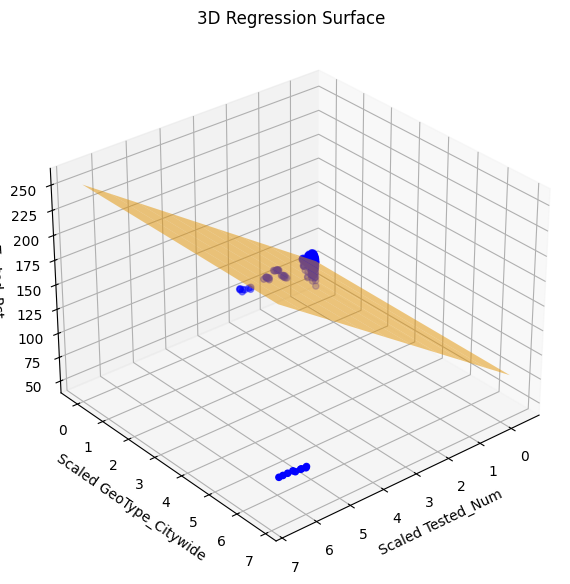

In [695]:
#6
# Step 1: Extract and scale the original input features
x1_raw = X['Tested_Num'].values.reshape(-1, 1)
x2_raw = X['GeoType_Citywide'].values.reshape(-1, 1)

# Recombine the features to transform both at once
scaler_vis = StandardScaler()
X_vis_raw = np.hstack((x1_raw, X[['Year']].values, x2_raw))
X_vis_scaled = scaler_vis.fit_transform(X_vis_raw)

# Extract the relevant scaled columns
x1_scaled = X_vis_scaled[:, 0]
x2_scaled = X_vis_scaled[:, 2]
y_flat = y.values.flatten()

# Step 2: Create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_scaled, x2_scaled, y_flat, color='blue', label='Actual Data')

# Step 3: Generate a meshgrid for surface prediction
x1_range = np.linspace(x1_scaled.min(), x1_scaled.max(), 10)
x2_range = np.linspace(x2_scaled.min(), x2_scaled.max(), 2)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Step 4: Compute predictions using the model's learned parameters
y_grid = (
    linModel.intercept_
    + linModel.coef_[0] * x1_grid      # Tested_Num
    + linModel.coef_[2] * x2_grid      # GeoType_Citywide
)

# Step 5: Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='orange')

# Step 6: Label the plot
ax.set_xlabel('Scaled Tested_Num')
ax.set_ylabel('Scaled GeoType_Citywide')
ax.set_zlabel('Tested_Pct')
ax.view_init(30, 50)
plt.title('3D Regression Surface')
plt.show()



In [696]:
#7
# Predict using the model
y_pred = linModel.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
training_score = linModel.score(X_train, y_train)
testing_score = linModel.score(X_test, y_test)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²: {r2:.4f}")

print(f"Training R² Score: {training_score:.4f}")
print(f"Testing R² Score: {testing_score:.4f}")


Mean Absolute Error (MAE): 4.37
Mean Squared Error (MSE): 28.56
Root Mean Squared Error (RMSE): 5.34
R²: 0.1889
Training R² Score: 0.1591
Testing R² Score: 0.1889


# Task 3: Regression Analysis — Justification
In this task:

* Defined Tested_Pct as the target variable.

* Included both numerical (Tested_Num, Year) and categorical (via GeoType_) features in a multiple regression model.

* Standardized inputs and used PolynomialFeatures (degree=2) to capture nonlinear relationships.

* Evaluated the model using MAE, MSE, RMSE, and R², and visualized the regression surface in 3D.